머신러닝의 또 다른 거대한 축인 '분류(Classification)'를 다룬다. 그중에서도 가장 기초가 되면서, 실제 의료 현장의 임상 연구 논문에서 가장 많이 등장하는 '로지스틱 회귀(Logistic Regression)'의 개념을 이해하는 것을 목표로 한다.

이 시간의 핵심은 "숫자를 예측하는 회귀와 정답을 선택하는 분류가 어떻게 다른지", 그리고 "직선을 어떻게 S자 곡선으로 휘게 만들어서 확률을 계산하는지"를 이해하는 것이다.

---

# 📘 [2일차 1교시] 1.1. 로지스틱 회귀: 직선을 구부려 확률을 만들다

## 1. 회귀(Regression)와 분류(Classification)의 결정적 차이

### 1) "얼마입니까?" vs "무엇입니까?"
1일차에 우리가 배웠던 선형 회귀는 '연속적인 숫자(Continuous Value)'를 맞추는 것이었다.
*   "내년도 의료비가 얼마일까?" (예: 1,500,000원, 1,500,010원 ...)
*   "이 환자의 수축기 혈압이 몇 mmHg일까?" (예: 120, 121, 135 ...)
이 질문들의 정답은 무한히 많은 숫자 중 하나이다.

하지만 현실 세계, 특히 의료 현장의 질문은 숫자로 끝나지 않는다. 의사들은 결단을 내려야 한다.
*   "그래서, 이 종양이 암입니까, 아닙니까?"
*   "이 환자에게 수술을 해야 합니까, 말아야 합니까?"
*   "이 사진 속의 장기가 간입니까, 위입니까?"

이것은 숫자를 예측하는 것이 아니라, 정해진 '클래스(Class, 범주)' 중 하나를 선택하는 문제이다. 이것을 '분류(Classification)'라고 한다. 그중에서도 "Yes or No" 두 가지 중 하나를 고르는 것을 '이진 분류(Binary Classification)'라고 한다.

### 2) 선형 회귀로 분류를 할 수 없는 이유
초심자가 가장 많이 하는 질문이 있다. "어제 배운 선형 회귀($y=wx+b$)로도 분류를 할 수 있지 않을까?"
예를 들어, 종양 크기($x$)에 따라 암 여부($y$)를 예측한다고 해보자. (암=1, 정상=0)

*   시도: 종양 크기가 클수록 1에 가깝고, 작을수록 0에 가까운 직선을 그어본다. 그리고 "0.5보다 크면 암이라고 하자"라고 기준을 정한다.
*   문제 1 (범위의 모순): 선형 회귀는 직선이므로 $x$가 계속 커지면 $y$값은 끝도 없이 올라간다.
    *   종양이 아주 크면 예측값이 10, 100이 나올 수도 있다.
    *   "이 환자의 암일 확률은 1000%입니다"라는 말은 수학적으로 성립하지 않는다. 확률은 0과 1 사이여야 한다.
*   문제 2 (이상치에 의한 왜곡): 아주 극단적으로 큰 종양 데이터(이상치)가 하나 들어왔다고 치자.
    *   선형 회귀 직선은 그 먼 점까지 맞추려고 기울기를 완만하게 눕혀버린다.
    *   그 결과, 원래는 암(1)으로 잘 분류되던 중간 크기의 종양들이 기준선(0.5) 밑으로 떨어져서 정상(0)으로 오진되는 사태가 벌어진다.

즉, "직선(Linear)"은 0과 1이라는 닫힌 세계를 설명하기에는 너무나 뻣뻣하고 융통성이 없는 도구이다. 우리는 직선 대신, 0과 1 사이를 부드럽게 이어주는 '곡선'이 필요하다.

---

## 2. 시그모이드(Sigmoid) 함수: 직선을 S자로 구부리는 마법

수학자들은 직선($-\infty \sim +\infty$)의 값을 확률의 범위($0 \sim 1$)로 압축해주는 마법 같은 함수를 찾아냈다. 바로 시그모이드(Sigmoid) 함수이다.

### 1) 시그모이드의 생김새와 역할
시그모이드 함수는 알파벳 'S'자처럼 생겼다.
$$ S(z) = \frac{1}{1 + e^{-z}} $$
수식이 복잡해 보이지만, 기능은 아주 단순하다. 어떤 숫자($z$)가 들어오든, 결과를 무조건 0과 1 사이로 찌그러뜨린다(Squashing).

*   입력이 0일 때: 출력은 정확히 0.5 (50%)가 된다.
*   입력이 매우 클 때 (예: 100): 출력은 1 (100%)에 한없이 가까워진다. (하지만 1을 넘지는 않는다.)
*   입력이 매우 작을 때 (예: -100): 출력은 0 (0%)에 한없이 가까워진다. (하지만 0 밑으로 내려가진 않는다.)

### 2) 로지스틱 회귀의 작동 원리
로지스틱 회귀는 사실 '회귀'가 아니라 '분류' 알고리즘이다. 그런데 왜 이름에 '회귀'가 붙었을까? 바로 내부적으로는 선형 회귀를 사용하기 때문이다.

1.  1단계 (선형 결합): 먼저 선형 회귀처럼 계산한다.
    *   $z = w \times \text{종양크기} + b$
    *   여기서 나온 $z$값은 -100이 될 수도, +500이 될 수도 있다.
2.  2단계 (활성화): 이 $z$값을 시그모이드 함수에 집어넣는다.
    *   $\text{예측값} = \text{Sigmoid}(z)$
    *   이제 결과는 0.0 ~ 1.0 사이의 값이 된다. 우리는 이것을 '암일 확률(Probability)'이라고 부른다.

즉, 로지스틱 회귀는 "선형 회귀의 결과를 확률로 변환해주는 기계"이다.

---

## 3. 확률에서 결정으로: 임계값(Threshold)

### 1) AI의 고민: "70%면 암인가요?"
로지스틱 회귀 모델이 계산을 마쳤다. "이 환자가 암일 확률은 0.7(70%)입니다."
이제 의사에게 결과를 알려줘야 한다. "암입니다"라고 해야 할까, "정상입니다"라고 해야 할까? 컴퓨터는 결단을 내려야 한다. 이때 필요한 기준선을 '임계값(Threshold)'이라고 한다.

### 2) 기본 임계값: 0.5
가장 상식적인 기준은 절반인 0.5이다.
*   확률 $\ge$ 0.5 $\rightarrow$ 1 (Positive, 암): "가능성이 반 이상이니 암으로 봅시다."
*   확률 < 0.5 $\rightarrow$ 0 (Negative, 정상): "가능성이 반도 안 되니 정상으로 봅시다."

### 3) 헬스케어에서의 임계값 조정 (Trade-off)
하지만 생명을 다루는 의료 현장에서는 0.5가 정답이 아닐 수 있다.
*   상황 A (놓치면 안 되는 암): 암을 조기에 발견 못 하면 환자가 사망한다. 이때는 의심만 가도 검사를 해야 한다.
    *   임계값을 0.3으로 낮춘다.
    *   "30%만 의심돼도 일단 양성으로 판정하고 정밀검사를 보내라!" (민감도를 높임)
*   상황 B (위험한 뇌 수술): 수술 부작용이 커서, 정말 확실한 환자가 아니면 수술하면 안 된다.
    *   임계값을 0.8로 높인다.
    *   "80% 이상 확실하지 않으면 수술하지 마라!" (정밀도를 높임)

로지스틱 회귀는 단순한 0/1 결과뿐만 아니라 '확률값' 자체를 제공하기 때문에, 의료진이 상황에 맞춰 이 임계값을 유연하게 조절할 수 있다는 장점이 있다.

---

## 4. 로지스틱 회귀가 사랑받는 이유: 설명력(Interpretability)

요즘 딥러닝이 유행이지만, 병원에서는 여전히 로지스틱 회귀를 많이 쓴다. 그 이유는 "왜 그렇게 판단했는지 설명할 수 있기 때문"이다.

### 1) 가중치($w$)의 의미: 오즈 비(Odds Ratio)
1일차에 배운 선형 회귀에서 $w$는 "x가 1 증가할 때 y가 증가하는 양"이었다.
로지스틱 회귀에서 $w$는 조금 더 특별한 의미인 '오즈 비(Odds Ratio)'와 연결된다.

*   오즈(Odds): 성공 확률과 실패 확률의 비율이다. (성공 확률 / 실패 확률)
    *   암일 확률이 0.8이라면, 오즈는 $0.8 / 0.2 = 4$이다. (암일 가능성이 4배 높다)
*   가중치 해석: 만약 '흡연' 변수의 가중치($w$)가 양수라면, 흡연은 암 발병 위험을 높이는 요인이다.
    *   수학적으로 $e^w$ (자연상수 e의 w제곱)를 계산하면, 이것이 바로 "흡연자가 비흡연자에 비해 암에 걸릴 위험이 몇 배나 높은지"를 나타내는 수치가 된다.

### 2) 의사와의 소통
딥러닝 모델은 "그냥 이미지를 보니까 암이래요"라고 말하지만, 로지스틱 회귀 모델은 이렇게 말할 수 있다.
> "분석 결과, '비만' 요인의 오즈 비가 3.5입니다. 즉, 체중이 1kg 증가할 때마다 발병 위험도가 3.5배씩 증가한다는 뜻입니다."

이처럼 질병의 '위험 인자(Risk Factor)'를 수치적으로 명확히 밝혀낼 수 있기 때문에, 로지스틱 회귀는 의학 통계의 표준 도구로 자리 잡고 있다.

---

## 5. 요약:

1.  분류(Classification): 연속된 숫자가 아니라, 정해진 정답(Class) 중 하나를 선택하는 문제이다. (암이다/아니다)
2.  시그모이드(Sigmoid): $-\infty \sim \infty$ 범위의 값을 가지는 선형 회귀의 결과를, $0 \sim 1$ 사이의 '확률'로 변환해주는 S자 곡선 함수이다.
3.  임계값(Threshold): 확률을 보고 최종적으로 0인지 1인지 결단을 내리는 기준선이다. 의료 상황에 따라 0.5가 아닌 값으로 조절할 수 있다.
4.  설명력: 로지스틱 회귀의 가중치는 질병 발생의 위험도가 몇 배 증가하는지를 설명하는 '오즈 비'로 해석될 수 있어 의학 연구에 필수적이다.

## 1.2. \[예제 1\] 왜 선형 회귀는 분류에 실패하는가?

먼저 1일차에 배운 선형 회귀를 분류 문제에 억지로 적용했을 때 발생하는
문제를 시각적으로 확인한다.

상황: 종양의 크기(cm)에 따른 악성(1)/양성(0) 판정.

``` python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. 데이터 생성
# 작은 종양들은 0(정상), 큰 종양들은 1(암)
X = np.array([1, 2, 3, 4, 10, 11, 12, 13]).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# 2. 선형 회귀 모델 학습
lin_model = LinearRegression()
lin_model.fit(X, y)

# 3. 예측 및 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c=y, cmap='bwr', s=100, edgecolor='k', label='Data')
plt.plot(X, lin_model.predict(X), color='green', linewidth=2, label='Linear Fit')

# 기준선(0.5) 표시
plt.axhline(0.5, color='gray', linestyle='--')
plt.axvline(7, color='gray', linestyle=':', label='Ideal Boundary')

plt.title('Why Linear Regression fails for Classification')
plt.ylabel('Malignant (1) / Benign (0)')
plt.xlabel('Tumor Size (cm)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 설명:
# 1. 직선이 0과 1 사이를 뚫고 지나가서 음수나 1 이상의 값을 예측한다 (확률 해석 불가).
# 2. 만약 아주 큰 종양(예: 50cm) 데이터가 하나 추가되면, 
#    직선의 기울기가 확 낮아지면서 원래 암(1)이었던 10cm 종양을 0.5 밑으로 떨어뜨려 정상(0)으로 오판하게 만든다.
```


> 📖 문제 풀이 가이드
>
> 왜 분류(Classification) 문제에 선형 회귀(Linear Regression)를 쓰면 안 되는지 눈으로 확인합니다.
> - 문제점 1: 확률은 0과 1 사이여야 하는데, 선형 회귀 직선은 이를 뚫고 지나가서 -0.5, 1.5 같은 말도 안 되는 값을 내놓습니다.
> - 문제점 2: 이상치(Outlier) 하나만 있어도 직선이 크게 휘청거려 엉뚱한 기준선을 만듭니다.
> - 결론: 분류 문제에는 직선이 아니라 S자 곡선이 필요합니다.



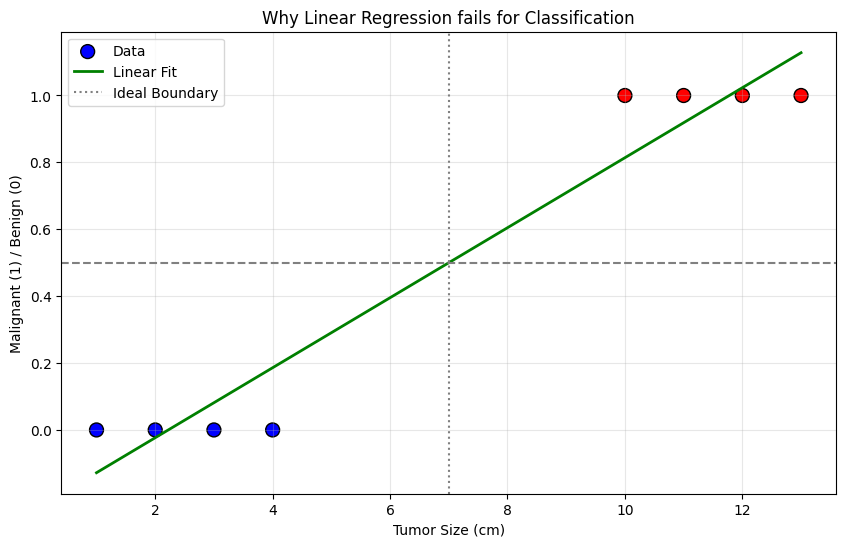

In [6]:
# do write code
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([1,2,3,4,10,11,12,13]).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1])

lin_model = LinearRegression()
lin_model.fit(x,y)

plt.figure(figsize=(10,6))
plt.scatter(x,y,c=y, cmap='bwr', s=100, edgecolors='k', label = 'Data')
plt.plot(x, lin_model.predict(x), color='green', linewidth=2, label='Linear Fit')

plt.axhline(0.5, color='gray', linestyle='--')
plt.axvline(7, color='gray', linestyle=':', label='Ideal Boundary')

plt.title('Why Linear Regression fails for Classification')
plt.ylabel('Malignant (1) / Benign (0)')
plt.xlabel('Tumor Size (cm)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## 1.3. \[예제 2\] 시그모이드 함수 직접 구현하기

로지스틱 회귀의 핵심 엔진인 시그모이드 함수를 직접 코드로 짜보고, 직선을
어떻게 S자 곡선으로 만드는지 확인한다.

상황: 입력값 $z$가 $-\infty$에서 $+\infty$로 변할 때 출력값이 어떻게
변하는가?

``` python
# 1. 시그모이드 함수 정의
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 2. 입력값 범위 생성 (-10 ~ 10)
z = np.linspace(-10, 10, 100)
phi_z = sigmoid(z)

# 3. 시각화
plt.figure(figsize=(10, 6))
plt.plot(z, phi_z, color='blue', linewidth=3)

# 가이드라인
plt.axvline(0.0, color='black', linestyle='--') # 중앙
plt.axhline(0.5, color='black', linestyle='--') # 확률 0.5 (임계값)
plt.axhline(0.0, color='gray', linestyle=':')   # 하한선
plt.axhline(1.0, color='gray', linestyle=':')   # 상한선

plt.title('Sigmoid Function: The Engine of Logistic Regression')
plt.xlabel('z (Linear Output: wx + b)')
plt.ylabel('Probability (0 ~ 1)')
plt.yticks([0, 0.5, 1]) # y축 눈금
plt.show()

# 설명:
# 입력(z)이 0일 때 정확히 확률이 0.5가 된다.
# 입력이 양수로 커지면 확률은 1에 수렴하고, 음수로 작아지면 0에 수렴한다.
# 이 함수 덕분에 우리는 어떤 숫자든 '확률'로 변환할 수 있다.
```


> 📖 문제 풀이 가이드
>
> 로지스틱 회귀의 심장, 시그모이드(Sigmoid) 함수를 직접 만들어봅니다.
> - 수식: $S(z) = \frac{1}{1 + e^{-z}}$
> - 기능: 어떤 숫자(z)가 들어오든 0과 1 사이의 '확률'로 압축해줍니다.
> - 해석:
>   - $z=0$ 일 때 정확히 $0.5$ (50%)
>   - $z$가 양수면 1에 가까워짐 (암일 확률 높음)
>   - $z$가 음수면 0에 가까워짐 (정상일 확률 높음)



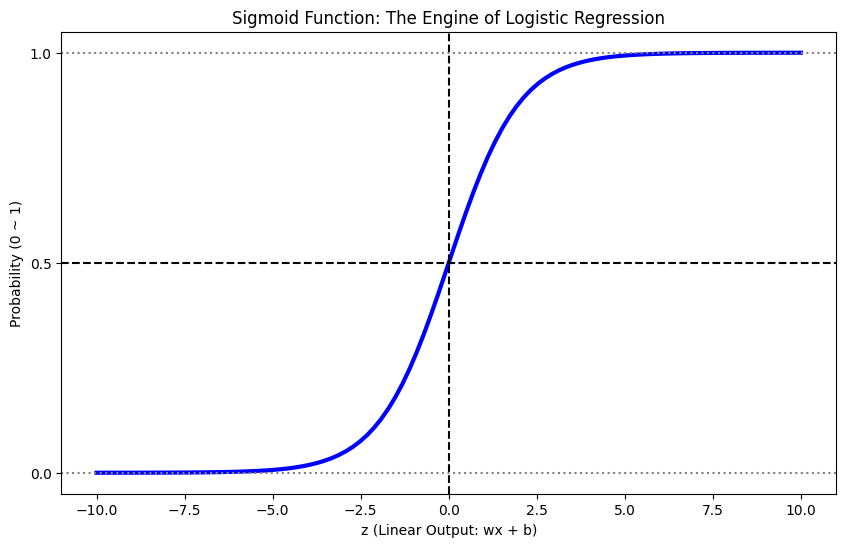

In [12]:
# do write code
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
phi_z = sigmoid(z)

plt.figure(figsize=(10,6))
plt.plot(z,phi_z, color='blue', linewidth=3)

plt.axvline(0.0, color='black', linestyle='--')
plt.axhline(0.5, color='black', linestyle='--')
plt.axhline(0.0, color='gray', linestyle=':')
plt.axhline(1.0, color='gray', linestyle=':')

plt.title('Sigmoid Function: The Engine of Logistic Regression')
plt.xlabel('z (Linear Output: wx + b)')
plt.ylabel('Probability (0 ~ 1)')
plt.yticks([0,0.5,1])
plt.show()

## 1.4. \[예제 3\] Scikit-learn 로지스틱 회귀 실습

이제 라이브러리를 사용하여 실제 분류 모델을 만들어본다.

상황: 환자의 나이에 따른 심장병 유무 예측.

``` python
from sklearn.linear_model import LogisticRegression

# 1. 데이터 준비
# 나이 (특성)
X_age = np.array([20, 25, 30, 35, 40, 45, 50, 55, 60, 65]).reshape(-1, 1)
# 심장병 유무 (0: 없음, 1: 있음) - 나이가 들수록 발병 확률 높음
y_heart = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# 2. 로지스틱 회귀 모델 생성 및 학습
# solver='lbfgs'는 최적화 알고리즘 중 하나 (기본값)
log_model = LogisticRegression(solver='lbfgs')
log_model.fit(X_age, y_heart)

# 3. 결과 확인
print(f"가중치(w): {log_model.coef_[0][0]:.4f}")
print(f"편향(b): {log_model.intercept_[0]:.4f}")

# 4. 시각화 (S-Curve 확인)
plt.figure(figsize=(10, 6))
plt.scatter(X_age, y_heart, c=y_heart, cmap='bwr', s=100, label='Patient Data')

# S자 곡선 그리기
x_range = np.linspace(15, 70, 300).reshape(-1, 1)
y_prob = log_model.predict_proba(x_range)[:, 1] # 확률값 가져오기

plt.plot(x_range, y_prob, color='blue', label='Logistic Regression Curve')
plt.axhline(0.5, color='green', linestyle='--', label='Decision Boundary (0.5)')
plt.xlabel('Age')
plt.ylabel('Probability of Heart Disease')
plt.legend()
plt.show()

# 설명:
# 파란 선(로지스틱 회귀)이 데이터 포인트들을 부드럽게 감싸며 0에서 1로 올라간다.
# 확률이 0.5를 넘는 지점(약 42~43세)이 이 모델이 생각하는 '발병 위험 구간'의 시작점이다.
```


> 📖 문제 풀이 가이드
>
> 라이브러리(`Scikit-learn`)를 이용해 실제 로지스틱 회귀 모델을 학습시킵니다.
> - 모델: `LogisticRegression`
> - 학습: `.fit(X, y)`
> - 결과 확인:
>   - `.coef_` (가중치 $w$): 이 변수가 확률을 얼마나 높이는지
>   - `.intercept_` (편향 $b$): 기본 확률(베이스라인)이 얼마인지
> - 시각화: 파란색 S자 곡선이 데이터를 얼마나 잘 설명하는지 확인해보세요.



가중치(w): 0.7399
편향(b): -31.4466


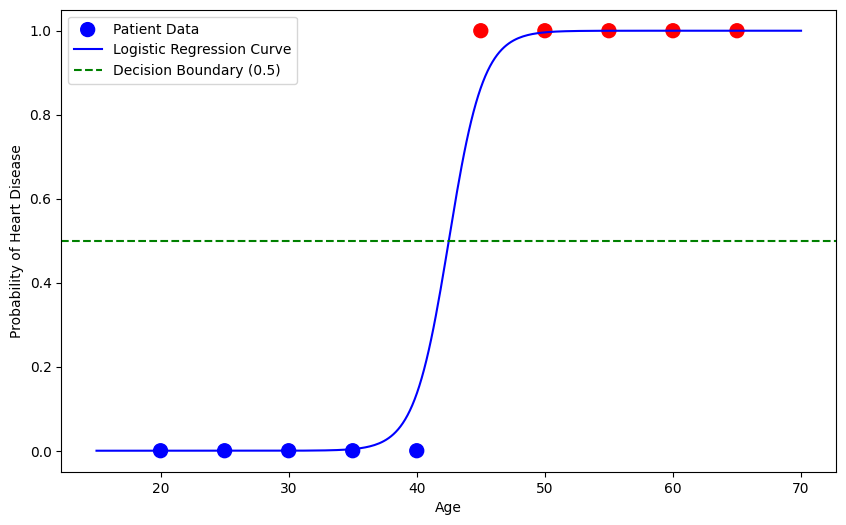

In [3]:
# do write code
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

x_age = np.array([20,25,30,35,40,45,50,55,60,65]).reshape(-1,1)
y_heart = np.array([0,0,0,0,0,1,1,1,1,1])

log_model = LogisticRegression(solver='lbfgs')
log_model.fit(x_age, y_heart)

print(f"가중치(w): {log_model.coef_[0][0]:.4f}")
print(f"편향(b): {log_model.intercept_[0]:.4f}")

plt.figure(figsize=(10,6))
plt.scatter(x_age,y_heart, c=y_heart, cmap='bwr', s=100, label='Patient Data')

x_range = np.linspace(15,70,300).reshape(-1, 1)
y_prob = log_model.predict_proba(x_range)[:,1]

plt.plot(x_range, y_prob, color="blue", label='Logistic Regression Curve')
plt.axhline(0.5, color='green', linestyle='--', label="Decision Boundary (0.5)")
plt.xlabel('Age')
plt.ylabel('Probability of Heart Disease')
plt.legend()
plt.show()

## 1.5. \[예제 4\] 확률 예측: `predict` vs `predict_proba`

로지스틱 회귀의 진가는 단순히 0/1 결과뿐만 아니라, ‘확신의
정도(Confidence)’를 알 수 있다는 점이다.

상황: 43세 환자와 70세 환자의 심장병 진단 결과 비교.

``` python
# 새로운 환자 데이터
new_patients = np.array([[43], [70]])

# 1. predict() : 결과 클래스(0 또는 1)만 알려줌
predictions = log_model.predict(new_patients)

# 2. predict_proba() : 각 클래스에 속할 '확률'을 알려줌
# 결과는 [0일 확률, 1일 확률] 형태로 나온다.
probs = log_model.predict_proba(new_patients)

print("=== 진단 결과 ===")
for i, age in enumerate(new_patients):
    print(f"나이: {age[0]}세")
    print(f"  -> 예측 판정(Class): {predictions[i]} ({'심장병' if predictions[i]==1 else '정상'})")
    print(f"  -> 발병 확률(Prob):  {probs[i][1]*100:.2f}%")
    print("-" * 30)

# 설명:
# 43세 환자는 확률이 50% 근처라서 모델도 헷갈려하는 경계선에 있다.
# 70세 환자는 확률이 99% 이상으로, 모델이 매우 강하게 심장병이라고 확신한다.
# 의사는 이 확률 정보를 보고 43세 환자에게는 "검사를 좀 더 해봅시다"라고 말할 수 있다.
```


> 📖 문제 풀이 가이드
>
> 모델이 내놓는 결과는 두 가지 형태가 있습니다.
> - `predict(X)`: 딱 잘라서 정답만 말해! (0 또는 1)
> - `predict_proba(X)`: 얼마나 확신해? (0일 확률 vs 1일 확률)
> - 활용: 의료 현장에서는 단순 판정보다 "암일 확률 70%입니다"라는 정보가 훨씬 중요합니다. 임계값(Threshold)을 조절하여 민감도를 바꿀 수 있기 때문입니다.



In [9]:
# do write code
new_patients = np.array([[43], [70]])

predictions = log_model.predict(new_patients)

probs = log_model.predict(new_patients)

probs = log_model.predict_proba(new_patients)

print("=== 진단 결과 ===")
for i, age in enumerate(new_patients):
    print(f"나이: {age[0]}세")
    print(f"  -> 예측 판정(Class): {predictions[i]} ({'심장병' if predictions[i]==1 else '정상'})")
    print(f"  -> 발병 확률(Prob): {probs[i][1]*100:.2f} %")
    print('-'*30)

=== 진단 결과 ===
나이: 43세
  -> 예측 판정(Class): 1 (심장병)
  -> 발병 확률(Prob): 59.15 %
------------------------------
나이: 70세
  -> 예측 판정(Class): 1 (심장병)
  -> 발병 확률(Prob): 100.00 %
------------------------------


## 1.6. \[예제 5\] 임상적 해석: 오즈 비(Odds Ratio) 계산

헬스케어 데이터 분석의 꽃, 모델의 가중치를 해석하여 의학적 인사이트를
도출해본다.

상황: ‘흡연 여부(0/1)’와 ’폐암(0/1)’ 데이터를 분석하여, 흡연의
위험도를 수치화한다.

``` python
# 1. 데이터 준비 (가상)
# X: 흡연 여부 (0: 비흡연, 1: 흡연)
X_smoke = np.array([0]*50 + [1]*50).reshape(-1, 1)
# y: 폐암 발병 여부 (비흡연자는 적게, 흡연자는 많이 발병하도록 조작)
# 비흡연자 50명 중 5명 발병, 흡연자 50명 중 20명 발병 가정
y_cancer = np.array([0]*45 + [1]*5 + [0]*30 + [1]*20)

# 2. 모델 학습
model_odds = LogisticRegression()
model_odds.fit(X_smoke, y_cancer)

# 3. 가중치(Coefficient) 확인
w = model_odds.coef_[0][0]
print(f"학습된 가중치(Log Odds): {w:.4f}")

# 4. 오즈 비(Odds Ratio) 계산
# 가중치에 지수함수(exp)를 취하면 오즈 비가 된다.
odds_ratio = np.exp(w)

print("=" * 40)
print(f"* 오즈 비 (Odds Ratio): {odds_ratio:.2f} *")
print("=" * 40)
print(f"해석: 흡연자는 비흡연자에 비해 폐암에 걸릴 위험(Odds)이 약 {odds_ratio:.2f}배 높습니다.")

# 참고:
# 통계적으로 엄밀한 계산에서는 신뢰구간도 필요하지만, 
# 머신러닝 관점에서는 이렇게 가중치를 통해 변수의 영향력을 '배수'로 해석할 수 있다는 점이 중요하다.
```


> 📖 문제 풀이 가이드
>
> 오즈 비(Odds Ratio)는 헬스케어 데이터 분석의 핵심입니다.
> - 개념: 성공(발병) 확률이 실패(정상) 확률보다 몇 배 높은가?
> - 계산: $e^w$ (가중치 w에 지수함수를 취함)
> - 해석 예시:
>   - 오즈 비가 2.0이다 $\rightarrow$ "이 위험 인자가 있으면 발병 위험이 2배 증가한다."
>   - 오즈 비가 0.5이다 $\rightarrow$ "이 약을 먹으면 발병 위험이 0.5배로 줄어든다(예방 효과)."



In [12]:
# do write code
x_smoke = np.array([0]*50 + [1]*50).reshape(-1,1)
y_cancer = np.array([0]*45+[1]*5+[0]*30+[1]*20)

model_odds = LogisticRegression()
model_odds.fit(x_smoke, y_cancer)

w = model_odds.coef_[0][0]
print(f"학습된 가중치 (Log Odds): {w:.4f}")

odds_ratio = np.exp(w)

print('='*40)
print(f'* 오즈 비 (Odds Ratio): {odds_ratio:.2f} *')
print('='*40)
print(f'해석: 흡연자는 비흡연자에 비해 폐암에 걸릴 위험(Odds)이 약 {odds_ratio:.2f}배 높습니다.')

학습된 가중치 (Log Odds): 1.3959
* 오즈 비 (Odds Ratio): 4.04 *
해석: 흡연자는 비흡연자에 비해 폐암에 걸릴 위험(Odds)이 약 4.04배 높습니다.
